© [Mariia Seleznova](https://www.ai.math.uni-muenchen.de/members/postdocs/mariia-seleznova/index.html), 2025. [CC BY 4.0](https://creativecommons.org/licenses/by/4.0/).

# Covid-19 time series data

The goal of this task is to visualize the [Covid-19 data provided by WHO](https://covid19.who.int/data). 

We will download the dataset of *weekly* cases and deaths reported to WHO under the following link:

[https://srhdpeuwpubsa.blob.core.windows.net/whdh/COVID/WHO-COVID-19-global-data.csv](https://srhdpeuwpubsa.blob.core.windows.net/whdh/COVID/WHO-COVID-19-global-data.csv)

In [1]:
import os
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt

In [2]:
%config InlineBackend.figure_format='svg' #set the format of figures displayed in notebook to svg (vector)

As we have done before, we will in general download this data only if we have not already done so. However, keep in mind that this data is constantly updated. In order to enforce a new download we implement a switch `force_update` that whenever set to `True` will conduct a new download of the data.

In [3]:
force_update = False

Here is our old data loading code, now slightly modified to include the switch above:

In [4]:
url = 'https://srhdpeuwpubsa.blob.core.windows.net/whdh/COVID/WHO-COVID-19-global-data.csv'
file_name = 'covid19_global_data.csv'

if os.path.exists(file_name) and force_update == False:
    print(f'Loading data from local file `{file_name}`...')
    df = pd.read_csv(file_name, parse_dates=['Date_reported'])
else:
    print(f'Loading data from `{url}`...')
    df = pd.read_csv(url, parse_dates=['Date_reported'])
    df.to_csv(file_name)
print('Done.')

Loading data from local file `covid19_global_data.csv`...
Done.


In [5]:
df

,Unnamed: 0,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,0,2020-01-05,AF,Afghanistan,EMRO,NaN,0,NaN,0
1,1,2020-01-12,AF,Afghanistan,EMRO,NaN,0,NaN,0
2,2,2020-01-19,AF,Afghanistan,EMRO,NaN,0,NaN,0
3,3,2020-01-26,AF,Afghanistan,EMRO,NaN,0,NaN,0
4,4,2020-02-02,AF,Afghanistan,EMRO,NaN,0,NaN,0
...,...,...,...,...,...,...,...,...,...
65755,65755,2025-03-02,ZW,Zimbabwe,AFRO,0.0,266410,NaN,5740
65756,65756,2025-03-09,ZW,Zimbabwe,AFRO,NaN,266410,NaN,5740
65757,65757,2025-03-16,ZW,Zimbabwe,AFRO,NaN,266410,NaN,5740
65758,65758,2025-03-23,ZW,Zimbabwe,AFRO,NaN,266410,NaN,5740


Check data types of the columns:

In [6]:
df.dtypes

Unnamed: 0                    int64
Date_reported        datetime64[ns]
Country_code                 object
Country                      object
WHO_region                   object
New_cases                   float64
Cumulative_cases              int64
New_deaths                  float64
Cumulative_deaths             int64
dtype: object

## Task 1: Confirmed cases and deaths

First, we filter the data to include only entries before August 1st 2024, since we will be only working with this part in the following.

In [7]:
df = df[df['Date_reported']<'01.08.2024']

Now we can plot the graph for task 1:

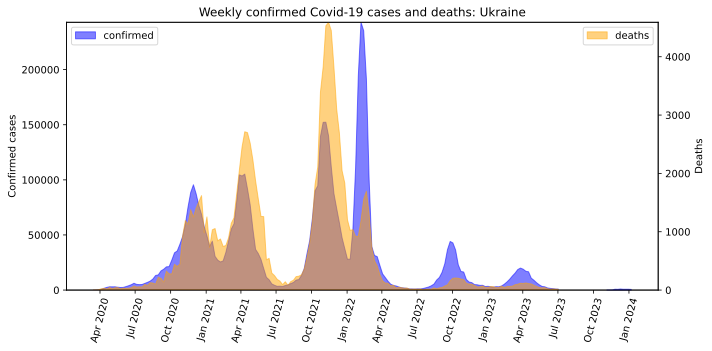

In [8]:
fig, ax = plt.subplots(figsize=(10,5))
ax2 = ax.twinx()

country = 'Ukraine'

country_df = df[df['Country']==country].copy()

ax.fill_between(country_df['Date_reported'], country_df['New_cases'],
                color='blue', 
                alpha=0.5, 
                label='confirmed')

ax2.fill_between(country_df['Date_reported'], 
                 country_df['New_deaths'],
                 color='orange', 
                 alpha=0.5, 
                 label='deaths')

ax.set_ylabel('Confirmed cases')
ax.set_ylim([0,country_df['New_cases'].max()])

ax2.set_ylabel('Deaths')
ax2.set_ylim([0,country_df['New_deaths'].max()])

ax.xaxis.set_major_locator(matplotlib.dates.MonthLocator(interval=3))
ax.xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%b %Y'))
ax.xaxis.set_tick_params(rotation=75)

ax.legend(loc='upper left')
ax2.legend()

ax.set_title(f'Weekly confirmed Covid-19 cases and deaths: {country}')
plt.tight_layout()

plt.savefig('images/new.svg')

## Task 2: Cumulative cases and deaths

This task is identical to the previous one, except we need to choose different columns of the data frame.

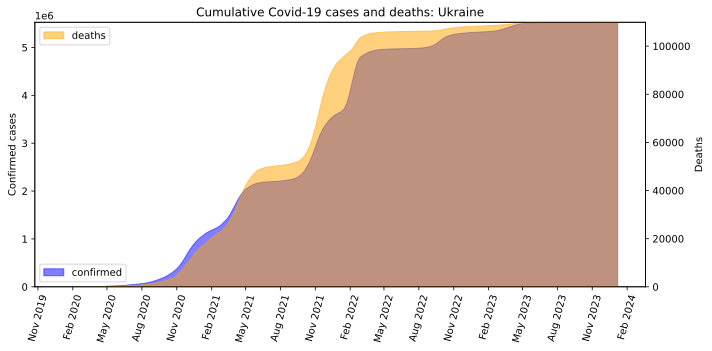

In [9]:
fig, ax = plt.subplots(figsize=(10,5))
ax2 = ax.twinx()

country_df = df[df['Country']==country].copy()

ax.fill_between(country_df['Date_reported'], country_df['Cumulative_cases'],
                color='blue', 
                alpha=0.5, 
                label='confirmed')

ax2.fill_between(country_df['Date_reported'], 
                 country_df['Cumulative_deaths'],
                 color='orange', 
                 alpha=0.5, 
                 label='deaths')

ax.set_ylabel('Confirmed cases')
ax.set_ylim([0,country_df['Cumulative_cases'].max()])

ax2.set_ylabel('Deaths')
ax2.set_ylim([0,country_df['Cumulative_deaths'].max()])

ax.xaxis.set_major_locator(matplotlib.dates.MonthLocator(interval=3))
ax.xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%b %Y'))
ax.xaxis.set_tick_params(rotation=75)

ax.legend(loc='lower left')
ax2.legend()

ax.set_title(f'Cumulative Covid-19 cases and deaths: {country}')
plt.tight_layout()

plt.savefig('images/cumulative.svg')

## Task 3: Confirmed cases by world region

The WHO data contains a colums that specifies the WHO region the country belongs to. The goal of this task is to visualize the fractions each of the regions contributes to the total world cases. 

First, we get the list of regions:

In [10]:
WHO_region_names = df.WHO_region.unique().astype(str)
WHO_region_names 

array(['EMRO', 'EURO', 'AFRO', 'WPRO', 'AMRO', 'SEARO', 'nan', 'OTHER'],
      dtype='<U5')

We remove the 'nan' value from the regions list:

In [11]:
WHO_region_names = WHO_region_names[WHO_region_names != 'nan'] # remove the nan

Now we group the data by region. After that, we want to get the sum of the reported values over the region for each week. Since we are not sure if each country in the region, and each region, reports on the same day, we use ```pd.resample``` function to compute the sum of the cases for each week consistently. 

In [12]:
new_cases_by_region = df[['Date_reported','New_cases','WHO_region']].groupby('WHO_region')
new_cases_by_region = new_cases_by_region.resample("W",on='Date_reported').sum("New_cases")

new_cases_by_region

New_cases
WHO_region Date_reported           
AFRO       2020-01-05           0.0
           2020-01-12           0.0
           2020-01-19           0.0
           2020-01-26           0.0
           2020-02-02           0.0
...                             ...
WPRO       2023-12-10       64279.0
           2023-12-17       98862.0
           2023-12-24      109894.0
           2023-12-31       78954.0
           2024-01-07       50581.0

[1470 rows x 1 columns]

Now everything is ready to create the plot:

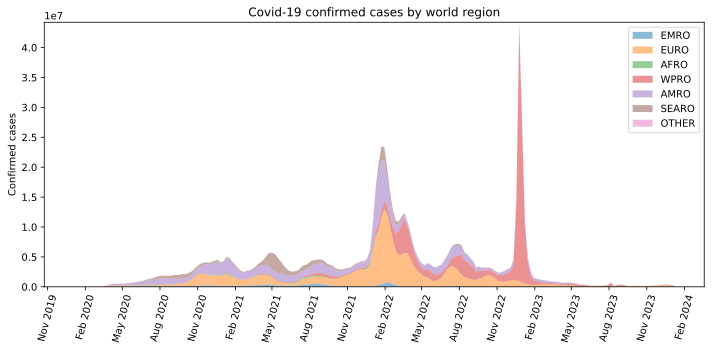

In [13]:
fig, ax = plt.subplots(figsize=(10,5))

prev = 0
for region in WHO_region_names[:]:
    region_data = new_cases_by_region.xs(region,level=0)

    ax.fill_between(region_data.index, 
                    prev+region_data['New_cases'], 
                    prev,
                    alpha=0.5, 
                    label=region)
    
    prev += region_data['New_cases']

ax.set_ylabel('Confirmed cases')
ax.set_ylim([0,prev.max()])

ax.xaxis.set_major_locator(matplotlib.dates.MonthLocator(interval=3))
ax.xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%b %Y'))
ax.xaxis.set_tick_params(rotation=75)

ax.legend(loc='upper right')

ax.set_title('Covid-19 confirmed cases by world region')
plt.tight_layout()

plt.savefig('images/by_region.svg')